In [3]:
import pandas as pd


from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

import scikitplot as skplt
import matplotlib.pyplot as plt

import cleaner as dc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
df_train = pd.read_csv("./data/authority_train_dataset.csv")
df_test = pd.read_csv("./data/authority_test_dataset.csv")

print(df_train.shape)
print(df_test.shape)

(4071, 2)
(570, 2)


In [16]:
# Cleaning and lemmatizing the traning and testing datasets

# Lower case
df_train['ad']= df_train['ad'].apply(lambda x: x.lower())
df_test['ad']= df_test['ad'].apply(lambda x: x.lower())

# Removing punctuations
df_train['ad']= df_train['ad'].str.replace('[^\w\s]','', regex=True)
df_test['ad']= df_test['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df_train['ad']= df_train['ad'].str.replace('\d+','',regex=True)
df_test['ad']= df_test['ad'].str.replace('\d+','',regex=True)

# Removing extra space 
df_train['ad']= df_train['ad'].str.replace('\s+', ' ',  regex=True)
df_test['ad']= df_test['ad'].str.replace('\s+', ' ',  regex=True)

#Apply denoise function
df_train['ad']= df_train['ad'].apply(dc.denoise_text)
df_test['ad']= df_test['ad'].apply(dc.denoise_text)

#Apply function on review column
df_train['ad']= df_train['ad'].apply(dc.remove_stopwords)
df_test['ad']= df_test['ad'].apply(dc.remove_stopwords)

#Apply function on review column
df_train['ad']= df_train['ad'].apply(dc.remove_special_characters)
df_test['ad']= df_test['ad'].apply(dc.remove_special_characters)

#Apply function on review column
df_train['ad']= df_train['ad'].apply(dc.simple_lemmatizer)
df_test['ad']= df_test['ad'].apply(dc.simple_lemmatizer)

In [17]:
X_train, X_test, y_train, y_test = df_train['ad'], df_test['ad'], df_train['authority'], df_test['authority']

In [18]:
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [19]:
# Creating and training the model 
clf = SVC(
    kernel='linear',
    C = 0.1, 
    )
    
clf.fit(X_train_tf, y_train)

SVC(C=0.1, kernel='linear')

accuracy:   0.895
              precision    recall  f1-score   support

no authority       0.96      0.89      0.92       389
   authority       0.79      0.91      0.85       181

    accuracy                           0.89       570
   macro avg       0.87      0.90      0.88       570
weighted avg       0.90      0.89      0.90       570

confusion matrix:
[[345  44]
 [ 16 165]]



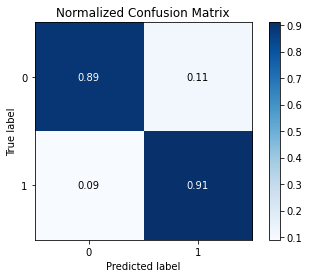

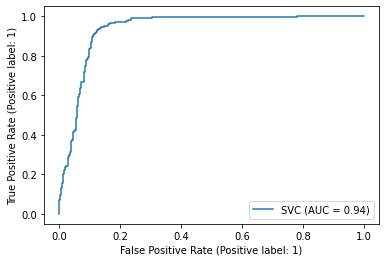

In [20]:
# predict the labels on validation dataset
predictions = clf.predict(X_test_tf)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no authority', 'authority']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [21]:
df_val = pd.read_csv('data/sample.csv')

# Lower case
df_val['ad']= df_val['ad'].apply(lambda x: x.lower())

# Removing punctuations
df_val['ad']= df_val['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df_val['ad']= df_val['ad'].str.replace('\d+','', regex=True)

# Removing extra space 
df_val['ad']= df_val['ad'].str.replace('\s+', ' ', regex=True)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.remove_stopwords)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.denoise_text)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.remove_special_characters)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.simple_lemmatizer)

accuracy:   0.841
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       113
           1       0.73      0.82      0.78        57

    accuracy                           0.84       170
   macro avg       0.82      0.84      0.83       170
weighted avg       0.85      0.84      0.84       170

confusion matrix:
[[96 17]
 [10 47]]



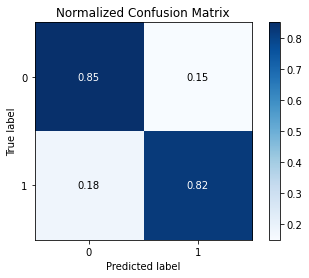

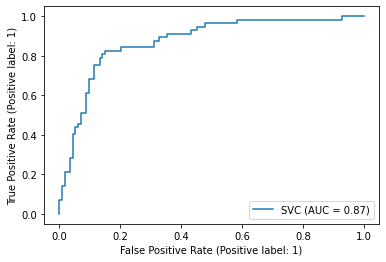

In [22]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['authority']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=['0', '1']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)